<a href="https://colab.research.google.com/github/yfhkucing/RandomForestBMS/blob/master/DataBMS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np


In [2]:
#dataframe 

df = pd.read_excel('Koordinat dan Input Skenario.xlsx',sheet_name='InputSkenario')
new_header = df.iloc[0] #grab the first row for the header
#df = df[1:] #take the data less the header row
#df.columns = new_header #set the header row as the df header
df.columns = df.columns.fillna('to_drop')
#df.drop('to_drop', axis = 1, inplace = True)
#df.drop('Skenario Lama', axis = 1, inplace = True)
#df.drop('PIC', axis = 1, inplace = True)
#df.drop('Iterasi', axis = 1, inplace = True)
#df.drop('Tanggal', axis = 1, inplace = True)
df.drop('Jam', axis = 1, inplace = True)
df

,Jendela,AC,Fan,Arah Sudut Kecepatan Angin derajat,Nilai Kecepatan Angin,Dry Bulb Temperature
0,0,0,0.0,171,0.5,27.0
1,0,0,0.0,153,0.4,31.5
2,0,0,0.0,47,4.8,33.1
3,0,0,0.0,62,4.1,27.4
4,0,0,0.0,341,3.8,30.6
...,...,...,...,...,...,...
187,1,1,1.0,163,0.9,31.4
188,1,1,1.0,210,0.1,31.3
189,1,1,1.0,247,0.3,26.7
190,1,1,1.0,265,1.0,28.1


In [3]:
df.describe()

,Jendela,AC,Fan,Arah Sudut Kecepatan Angin derajat,Nilai Kecepatan Angin,Dry Bulb Temperature
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,0.500000,0.500000,0.500000,180.333333,1.883333,29.691667
std,0.501307,0.501307,0.374406,97.809588,1.911479,2.035274
min,0.000000,0.000000,0.000000,47.000000,0.100000,26.700000
25%,0.000000,0.000000,0.247500,95.500000,0.375000,27.925000
50%,0.500000,0.500000,0.500000,167.000000,0.950000,29.850000
75%,1.000000,1.000000,0.752500,251.500000,3.875000,31.400000
max,1.000000,1.000000,1.000000,341.000000,5.300000,33.100000


In [4]:
df.dtypes

Jendela                                 int64
AC                                      int64
Fan                                   float64
Arah Sudut Kecepatan Angin derajat      int64
Nilai Kecepatan Angin                 float64
Dry Bulb Temperature                  float64
dtype: object

In [5]:
#replacing fan value

dictFan = {0:0,0.33:1,0.67:2,1:3}
df.replace({"Fan":dictFan})
df.describe()

,Jendela,AC,Fan,Arah Sudut Kecepatan Angin derajat,Nilai Kecepatan Angin,Dry Bulb Temperature
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,0.500000,0.500000,0.500000,180.333333,1.883333,29.691667
std,0.501307,0.501307,0.374406,97.809588,1.911479,2.035274
min,0.000000,0.000000,0.000000,47.000000,0.100000,26.700000
25%,0.000000,0.000000,0.247500,95.500000,0.375000,27.925000
50%,0.500000,0.500000,0.500000,167.000000,0.950000,29.850000
75%,1.000000,1.000000,0.752500,251.500000,3.875000,31.400000
max,1.000000,1.000000,1.000000,341.000000,5.300000,33.100000


In [6]:
#normalizing data

normalized_df=(df-df.min())/(df.max()-df.min())
normalized_df

,Jendela,AC,Fan,Arah Sudut Kecepatan Angin derajat,Nilai Kecepatan Angin,Dry Bulb Temperature
0,0.0,0.0,0.0,0.421769,0.076923,0.046875
1,0.0,0.0,0.0,0.360544,0.057692,0.750000
2,0.0,0.0,0.0,0.000000,0.903846,1.000000
3,0.0,0.0,0.0,0.051020,0.769231,0.109375
4,0.0,0.0,0.0,1.000000,0.711538,0.609375
...,...,...,...,...,...,...
187,1.0,1.0,1.0,0.394558,0.153846,0.734375
188,1.0,1.0,1.0,0.554422,0.000000,0.718750
189,1.0,1.0,1.0,0.680272,0.038462,0.000000
190,1.0,1.0,1.0,0.741497,0.173077,0.218750


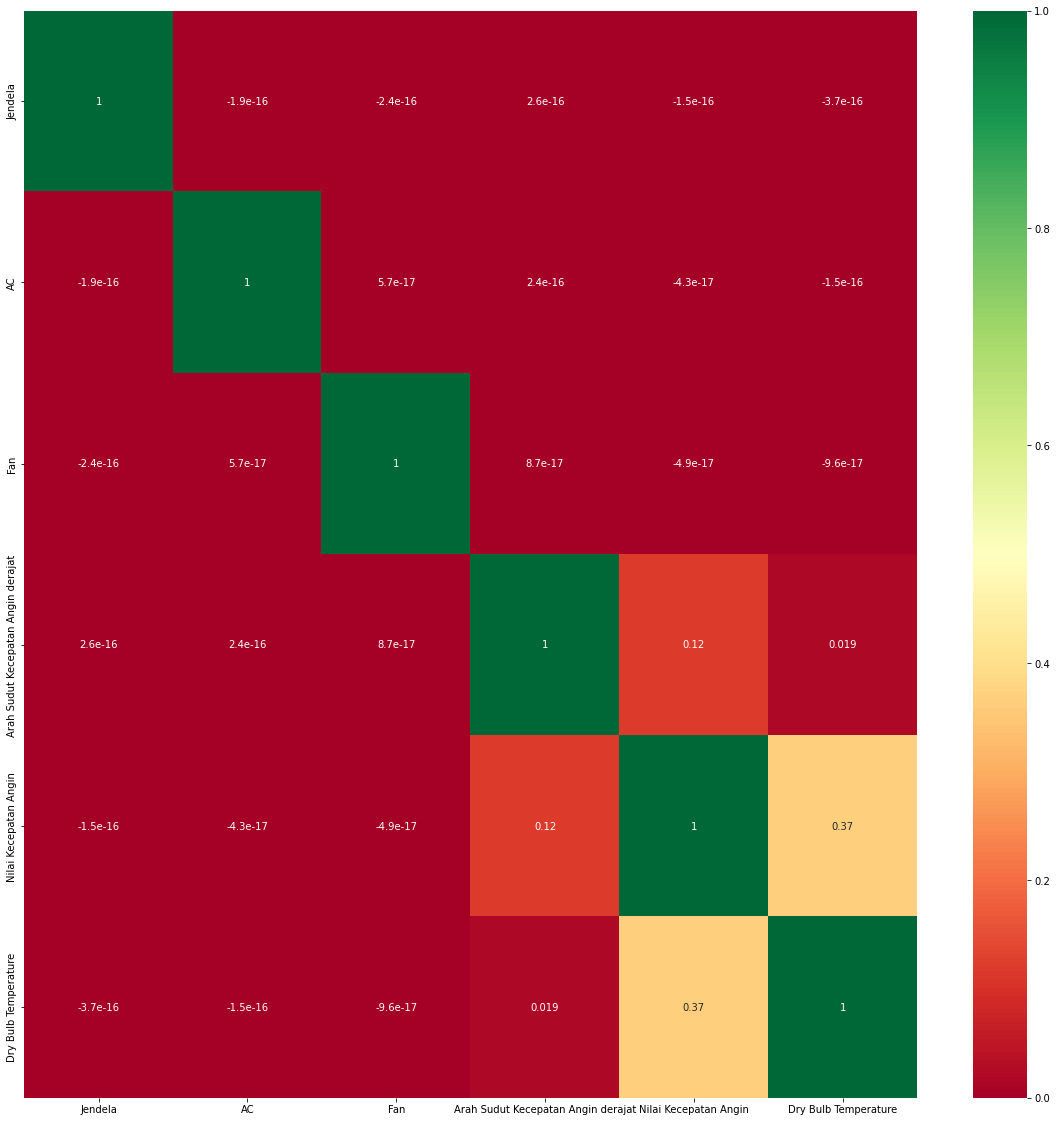

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

#correlation

corrmat = normalized_df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heat map

g=sns.heatmap(normalized_df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [10]:
#data Xn and Yn

Xn = normalized_df.drop(['Jendela','AC','Fan'], axis=1)
Yn = normalized_df.drop(['Arah Sudut Kecepatan Angin derajat',
                         'Nilai Kecepatan Angin',
                         'Dry Bulb Temperature'], axis=1)

In [20]:
#splitting data

from sklearn.model_selection import train_test_split
import numpy as np
Xn_train, Xn_test, Yn_train, Yn_test = train_test_split(Xn, Yn, test_size=0.4, random_state=4)
Xn_train = np.array(Xn_train)
Xn_test = np.array(Xn_test)
Yn_train = np.array(Yn_train)
Yn_test = np.array(Yn_test)
print(Yn_test.shape)

(77, 3)


In [25]:
#randomforest

from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=10, random_state=1)
clf.fit(Xn_train, Yn_train)
Yn_pred = clf.predict(Xn_test)
print(metrics.accuracy_score(Yn_test, Yn_pred))

ValueError: ignored